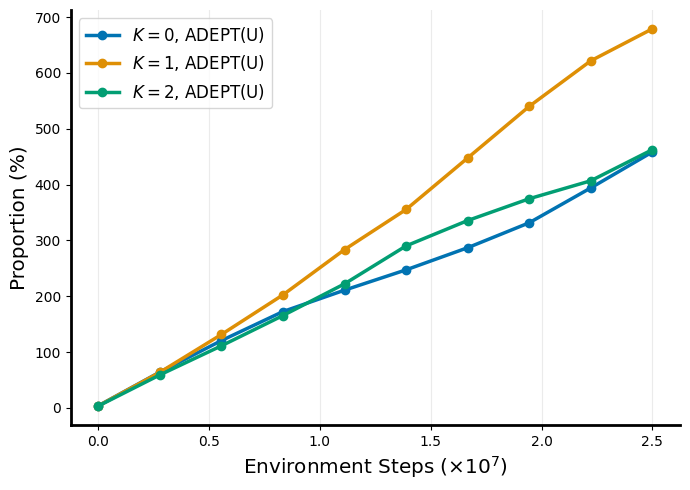

In [5]:
from logging import root
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import os

envs = ['bigfish', 'bossfight', 'caveflyer', 'chaser', 'climber', 'coinrun', 'dodgeball', 'fruitbot',
        'heist', 'jumper', 'leaper', 'maze', 'miner', 'ninja', 'plunder', 'starpilot']

fig, ax = plt.subplots(figsize=(7, 5))

colors = sns.color_palette("colorblind")
legends = ['$K=0$', '$K=1$', '$K=2$']
fake_patches = [Patch(color=colors[i], label=legends[i]) for i in range(len(legends))]
num_phases = 10
phases = np.linspace(10, 1525, num=num_phases, dtype=int)

counts = {0: np.zeros(shape=(num_phases)), 1: np.zeros(shape=(num_phases)), 2: np.zeros(shape=(num_phases))}
root = '../data/ppo_ucb_runs_lr_vfc_bs'
for idx, env in enumerate(envs):
    all_clusters = []
    for dir in os.listdir(root):
        if env in dir:
            data = np.load(os.path.join(root, dir), allow_pickle=True)
        all_clusters.append(data["data"].item()['h2o/cluster_idx'])
    all_clusters = np.array(all_clusters)

    for j, phase in enumerate(phases):
        counts[0][j] += np.where(all_clusters[:, :phase] == 0)[0].shape[0]
        counts[1][j] += np.where(all_clusters[:, :phase] == 1)[0].shape[0]
        counts[2][j] += np.where(all_clusters[:, :phase] == 2)[0].shape[0]
for k, hp in enumerate([0, 1, 2]):
    ax.plot(np.linspace(0, 2.5, num_phases), counts[hp] / 3 / 16 / 1525 * 100, label=legends[k]+', ADEPT(U)', linewidth=2.5, color=colors[k], marker='o')

ax.set_title(None)
ax.legend(loc='upper left', fontsize='large')
ax.set_ylabel('Proportion (%)', fontsize='x-large')
ax.set_xlabel(r'Environment Steps ($\times 10^7$)', fontsize='x-large')

ax.grid(True, axis="x", alpha=0.25)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

fig.tight_layout()